# Sampling
The process of drawing a subset from a population. We reuse the data frame of US populations saved from previous chapter.

In [3]:
load(file='data/state_pops.rda')
#head(state_pops)
summary(state_pops)

    State              Pop2010        
 Length:51          Min.   :  563626  
 Class :character   1st Qu.: 1696962  
 Mode  :character   Median : 4339367  
                    Mean   : 6053834  
                    3rd Qu.: 6636084  
                    Max.   :37253956  

Draw random sample of 16 state populations with sample(), and take an average (compare with the average of the entire population, 6,053,834)

In [4]:
mean(sample(state_pops$Pop2010, size=16, replace=TRUE))

[1] 4160887

Repeat the process a few times with replicate

In [5]:
replicate(4, mean(sample(state_pops$Pop2010, size=16, replace=TRUE)), simplify=TRUE)

[1] 4887987 8626995 5397172 4346121

now repeat many times and take an average -- should be closer to the actual the higher number the replicate

Also chart out the histogram to see what the distribution looks like

[1] Sample average =  6043115.09551563
[1] Population averge =  6053834.07843137  compare:  99.8229389379214 %


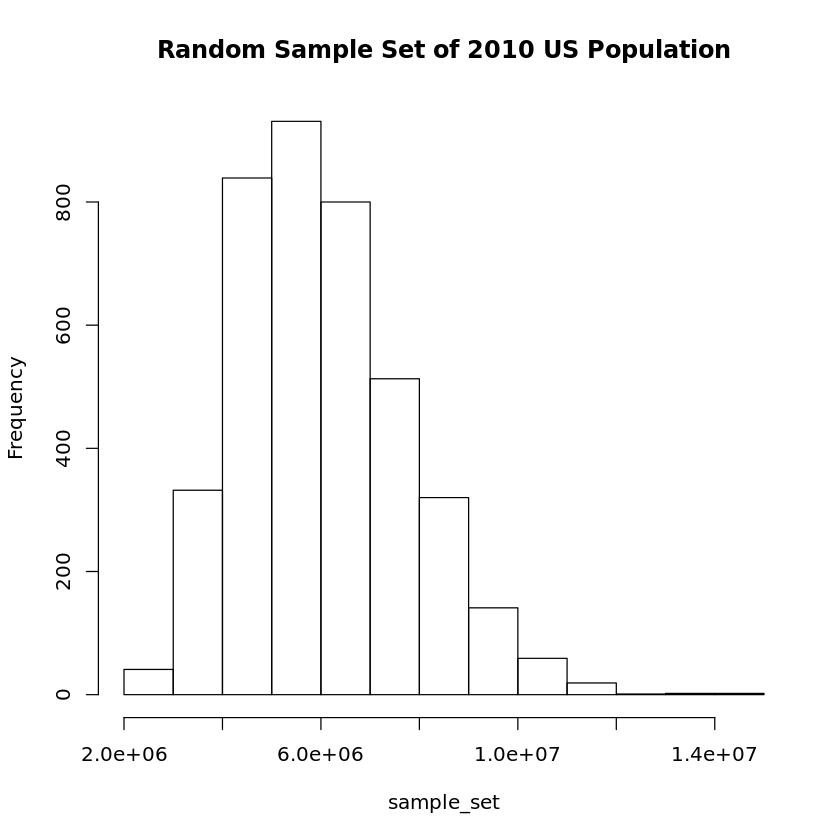

In [6]:
sample_set <- replicate(4000, mean(sample(state_pops$Pop2010, size=16, replace=TRUE)), simplify=TRUE)
sample_avg <- mean(sample_set)
print(paste("Sample average = ", sample_avg), quote=FALSE)
pop_avg <- mean(state_pops$Pop2010)
print(paste("Population averge = ", pop_avg, " compare: ", 100*sample_avg/pop_avg, "%"), quote=FALSE)
hist(sample_set, main='Random Sample Set of 2010 US Population')

Compare results from a greater sample size (51, i.e. the actual population). We will do 100 replications as there will still be a difference because we are sampling with replace=TRUE.

In [7]:
sample_avg2 = mean(replicate(100, mean(sample(state_pops$Pop2010, size=51, replace=TRUE)), simplify=TRUE))
print(paste("Population averge = ", pop_avg, " compare: ", 100*sample_avg2/pop_avg, "%"), quote=FALSE)

[1] Population averge =  6053834.07843137  compare:  101.468120128751 %


The sampling results will be exactly the same as actual if replace were FALSE

In [8]:
sample_avg3 = mean(sample(state_pops$Pop2010, size=51, replace=FALSE))
print(paste("Population averge = ", pop_avg, " compare: ", 100*sample_avg3/pop_avg, "%"), quote=FALSE)

[1] Population averge =  6053834.07843137  compare:  100 %


Exploring sample distribution with smaller sample size (5) and 10,000 iterations

[1] number of samples =  10000
[1] avg of the sample set =  6,115,298


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  733318  3917695  5428648  6115298  7669384 21324554 

25%     50%     75% 
3917695 5428648 7669384

[1] SD= 3,030,692


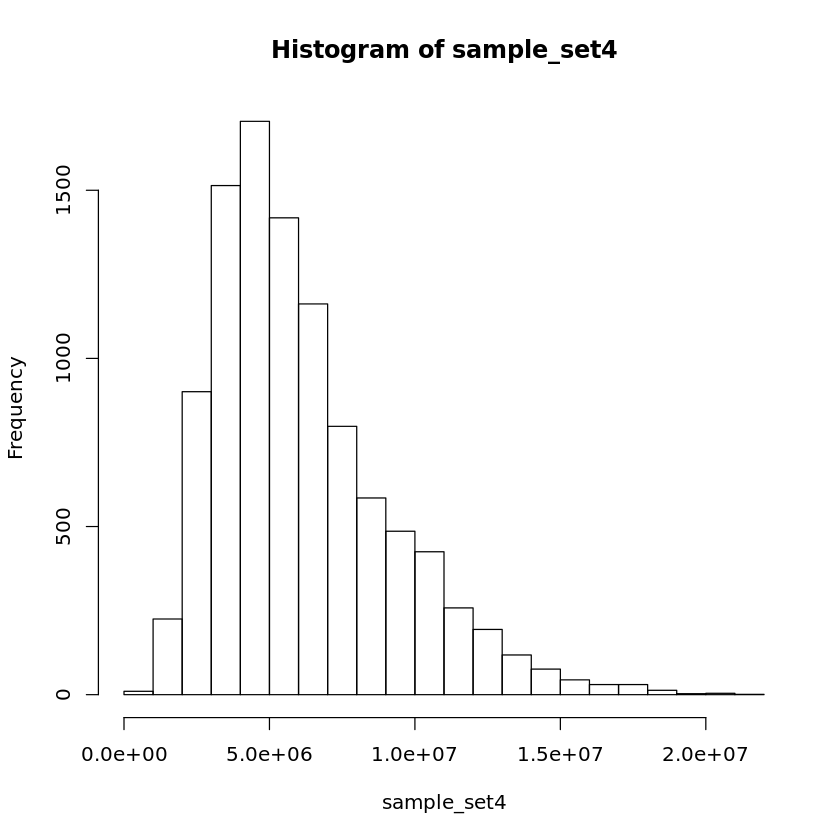

In [35]:
sample_set4 = replicate(10000, mean(sample(state_pops$Pop2010, size=5, replace=TRUE)), simplify=TRUE)
print(paste("number of samples = ", length(sample_set4)), quote = FALSE)
print(paste("avg of the sample set = ", format(round(mean(sample_set4), 0), big.mark = ",")), quote = FALSE)
hist(sample_set4)
summary(sample_set4)
quantile(sample_set4, probs = c(0.25, 0.5, 0.75))
print(paste("SD=", format(round(sd(sample_set4), 0), big.mark=",")), quote=FALSE)